<a href="https://colab.research.google.com/github/R46a/STML-2303A52277/blob/main/STML_ASS_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

file_path = '/content/breast_cancer_survival[1].csv'
data = pd.read_csv(file_path)

data = data.drop(columns=['Date_of_Surgery', 'Date_of_Last_Visit'])
data = data.dropna(subset=['Patient_Status'])
data_encoded = pd.get_dummies(
data,
columns=['Tumour_Stage', 'Histology', 'Surgery_type', 'ER status', 'PR status', 'HER2 status'],
drop_first=True
)

data_encoded['Patient_Status'] = data_encoded['Patient_Status'].map({'Alive': 1, 'Dead': 0})

X = data_encoded.drop(columns=['Patient_Status'])
y = data_encoded['Patient_Status']

print(X.head())
print(y.head())
print("Features shape:", X.shape)
print("Target shape:", y.shape)

   Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage_II  \
0   42  FEMALE   0.95256   2.15000  0.007972 -0.048340             True   
1   54  FEMALE   0.00000   1.38020 -0.498030 -0.507320             True   
2   63  FEMALE  -0.52303   1.76400 -0.370190  0.010815             True   
3   78  FEMALE  -0.87618   0.12943 -0.370380  0.132190            False   
4   42  FEMALE   0.22611   1.74910 -0.543970 -0.390210             True   

   Tumour_Stage_III  Histology_Infiltrating Lobular Carcinoma  \
0             False                                     False   
1             False                                     False   
2             False                                     False   
3             False                                     False   
4             False                                     False   

   Histology_Mucinous Carcinoma  Surgery_type_Modified Radical Mastectomy  \
0                         False                                     False   
1   

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
file_path = '/content/breast_cancer_survival[1].csv'
data = pd.read_csv(file_path)
data = data.drop(columns=['Date_of_Surgery', 'Date_of_Last_Visit'])
data = data.dropna(subset=['Patient_Status'])
data['Gender'] = data['Gender'].map({'FEMALE': 0, 'MALE': 1})
data_encoded = pd.get_dummies(
data,
columns=['Tumour_Stage', 'Histology', 'Surgery_type', 'ER status', 'PR status', 'HER2 status'],
drop_first=True
)
data_encoded['Patient_Status'] = data_encoded['Patient_Status'].map({'Alive': 1, 'Dead': 0})
X = data_encoded.drop(columns=['Patient_Status'])
y = data_encoded['Patient_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svm_model = SVC(random_state=42)
knn_model = KNeighborsClassifier()
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("SVM Accuracy:", accuracy_svm)
print("KNN Accuracy:", accuracy_knn)
print("Logistic Regression Accuracy:", accuracy_log_reg)

SVM Accuracy: 0.7692307692307693
KNN Accuracy: 0.7692307692307693
Logistic Regression Accuracy: 0.7692307692307693


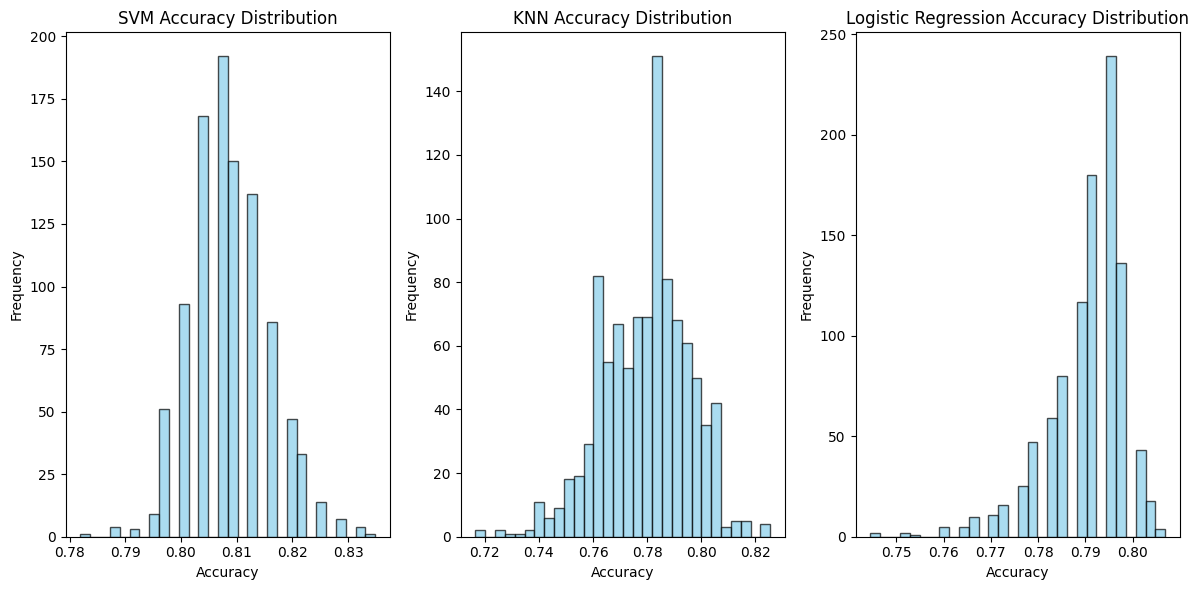

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
file_path = '/content/breast_cancer_survival[1].csv'
data = pd.read_csv(file_path)
data = data.drop(columns=[ 'Date_of_Surgery', 'Date_of_Last_Visit' ])
data = data.dropna(subset=['Patient_Status'])
data['Gender'] = data['Gender'].map({'FEMALE': 0, 'MALE': 1})
data_encoded = pd.get_dummies(
    data,
    columns=['Tumour_Stage', 'Histology', 'Surgery_type', 'ER status', 'PR status', 'HER2 status'],
    drop_first=True
)
data_encoded['Patient_Status'] = data_encoded['Patient_Status'].map({'Alive': 1, 'Dead': 0})
X = data_encoded.drop(columns=['Patient_Status'])
y = data_encoded['Patient_Status']
scaler = StandardScaler()
X = scaler.fit_transform(X)
svm_model = SVC(random_state=42)
knn_model = KNeighborsClassifier()
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)
n_bootstraps = 1000
bootstrapped_accuracies = {
    'SVM': [],
    'KNN': [],
    'Logistic Regression': []
}
for _ in range(n_bootstraps):
  indices = np.random.choice(range(len(X)), size=len(X), replace=True)
  X_boot, y_boot = X[indices], y.iloc[indices]
  svm_model.fit(X_boot, y_boot)
  bootstrapped_accuracies['SVM'].append(accuracy_score(y, svm_model.predict(X)))
  knn_model.fit(X_boot, y_boot)
  bootstrapped_accuracies['KNN'].append(accuracy_score(y, knn_model.predict(X)))
  log_reg_model.fit(X_boot, y_boot)
  bootstrapped_accuracies['Logistic Regression'].append(accuracy_score(y, log_reg_model.predict(X)))
plt.figure(figsize=(12, 6))
for i, (model_name, accuracies) in enumerate(bootstrapped_accuracies.items(), 1):
  plt.subplot(1, 3, i)
  plt.hist(accuracies, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
  plt.title(f'{model_name} Accuracy Distribution')
  plt.xlabel('Accuracy')
  plt.ylabel('Frequency')
plt.tight_layout()
plt.show()